#1. Scrape Data

In [247]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from pyquery import PyQuery as pq
from bs4 import BeautifulSoup
import requests

In [161]:

linkVec = []

for thisPage in [3]:#[2,3,4,5]:
    allLinkPage=requests.get("http://www.sirlinksalot.net/archives/thebachelor%d.html" % (thisPage))
    soup = BeautifulSoup(allLinkPage.text, "html.parser")
    rows = soup.find_all("a")
    for row in rows:
        rowString = str(row)
        checkASCII = [ord(letter) for letter in rowString]
        #print max(checkASCII),min(checkASCII)
        if max(checkASCII)<127 and min(checkASCII)>9:
        #    print max(checkASCII)<127 and min(checkASCII)>10
            thisLink = str(row.get("href"))
            if "sirlinksalot" not in thisLink: #remove internal links
                if "clickbank.net" not in thisLink: #remove ad links
                    if "pub43" not in thisLink: #remove ad links
                        if "bilbo" not in thisLink: #remove ad links
                            if "fastclick" not in thisLink: #remove ad links
                                if "casalemedia" not in thisLink: #remove ad links
                                    linkVec.append(thisLink)
                                


#cleaner = lambda r: [int(r[0].get_text()), r[1].get_text(), r[2].get_text(), r[2].find("a").get("href")]
#fields = ["ranking", "title", "band_singer", "url"]
#songs = [dict(zip(fields, cleaner(row.find_all("td")))) for row in rows]

In [162]:
print len(linkVec)

1753


In [163]:
#sort our vector to group similar website roots
linkVec = sorted(linkVec[0:20])

In [164]:
archivedLinkVec = []

count = 0;
length = len(linkVec)
for thisLink in linkVec:
    allLinkPage=requests.get("https://web.archive.org/web/*/" + thisLink)
    soup = BeautifulSoup(allLinkPage.text, "html.parser")
    if soup.find_all("div", attrs={"class": "date captures"}):
        row = soup.find_all("div", attrs={"class": "date captures"})[0]
        row = row.find("a").get("href")
        archivedLinkVec.append(str("https://web.archive.org" + row))
    count = count+1
    #print count, " out of ", length, " done"

In [165]:
#archivedLinkVec[0:40]
#https://web.archive.org/web/20130114020937/http://www.zap2it.com/news/pictures/zap-the-bachelor-meet-the-season-17-bachelorettes-20120925,0,7638604.photogallery?index=2

In [166]:
#we can assume that each article from the Examiner website will have similar HTML formatting. 
#So let us also note the root page.
rootPage = []
for link in archivedLinkVec:
    first = 50#link.find("www") 
    last = link.find(".com")+4
    rootPage.append(link[first:last])

In [167]:
#collect into a data frame
linkDF = pd.DataFrame()
linkDF['archived_link']=archivedLinkVec
linkDF['root_page']= rootPage


In [168]:
myGroups = linkDF.groupby('root_page')

In [169]:
count=0
for group in linkDF.root_page.unique():
    if group:
        count = count+1
        print group
print
print "There are",count, "unique groups."
    
#this shows that the number of unique websites whose formatting we need to learn is pretty limited.

blog.zap2it.com
insidetv.ew.com
www.digitalspy.com
www.eonline.com
www.examiner.com
www.people.com
www.usmagazine.com

There are 7 unique groups.


In [170]:
A = [1, 2, 3, 4]
A[1:3]

[2, 3]

In [171]:
#SEASON 13 BLUE BACKGROUND

season13Names =[]
season13PicLinks=[]
season13Link = "http://www.buddytv.com/slideshows/meet-the-cast-of-the-bachelor-season-13.aspx"
testPage=requests.get(season13Link)
soup = BeautifulSoup(testPage.text, "html.parser")
scripts = soup.find_all("script")

for script in scripts:
    if script.string:
        if "Slideshow.SlideshowNavigator" in str(script.string):
            mystring = str(script.string)
            myvec = mystring.split("{")
            myvec = myvec[7:32]
            for k in myvec:
                fromhere = str(k).find("Title")+8
                tohere = str(k).find("Blurb")-3
                season13Names.append(k[fromhere:tohere])
                fromhere = str(k).find("ImageId")+9
                tohere = str(k).find("PhotoCredit")-2
                season13PicLinks.append("http://images.buddytv.com/btv_2_%d_1_590_-1_0_/meet-the-cast-of--th.jpg" % int(k[fromhere:tohere]))
                    
# for j in range(897,922):
#     season13PicLinks.append("http://images.buddytv.com/btv_2_500311%d_1_590_-1_0_/meet-the-cast-of--th.jpg" % j)
    
len(season13Names), len(season13PicLinks)


(25, 25)

In [172]:
#### SEASON 14 BLUE BACKGROUND

season14Link = "http://www.realitytea.com/2009/12/17/meet-the-25-bachelorettes-of-the-bachelor-14-on-the-wings-of-love-photos/"
season14PicLinks = []
season14Names = []
testPage=requests.get(season14Link)
soup = BeautifulSoup(testPage.text, "html.parser")
rows = soup.find_all("img")
for row in rows:
    if row.get("src"):
        if "the-bachelor-14" in row.get("src"):
            season14PicLinks.append(str(row.get("src")))
            myname = str(row.get("alt"))
            myname = myname.split("14 ")[1]
            season14Names.append(myname)
            
len(season14Names),len(season14PicLinks)
#season14Names = ["Alexa Mcallister","Ali Fedotowsky","Ashleigh Hunt","Ashley Almore","Caitlyn McCabe","Channy Choch","Christina McCasland","Corrie","Elizabeth Kitt","Elizabeth Kreft","Ella Nolan","Emily Harkins","Gia Alliemand","Jessie Sulidis","Kathryn","Kimberly","Kirsten","Michelle Kujawa","Rozlyn Papa","Sheila","Stephanie","Tenley","Tiana","Valishia Savage","Vienna Girardi"]
#len(season14Names),len(season14PicLinks)

(26, 26)

In [173]:
#SEASON 15 BLUE BACKGROUND
#all on one page --  yay!
season15Link = "http://www.realitytea.com/2010/12/21/photos-meet-the-25-bachelorettes-of-brad-womacks-the-bachelor-15/"
season15PicLinks = []
season15Names=[]
testPage=requests.get(season15Link)
soup = BeautifulSoup(testPage.text, "html.parser")
rows = soup.find_all("img")
for row in rows:
    if row.get("src"):
        if "the-bachelor-15" in row.get("src"):
            season15PicLinks.append(str(row.get("src")))
            season15Names.append(str(row.get("alt")))
            
len(season15Names),len(season15PicLinks)

(28, 28)

In [174]:
#SEASON 16 BLUE BACKGROUND
#all on one page --  yay!
season16Link = "http://www.realitytea.com/2011/12/12/photos-%E2%80%93-meet-the-25-bachelorettes-of-ben-flajnik%E2%80%99s-the-bachelor-season-16/"
season16PicLinks = []
season16Names = []
testPage=requests.get(season16Link)
soup = BeautifulSoup(testPage.text, "html.parser")
rows = soup.find_all("img")
for row in rows:
    if row.get("data-lazy-src"):
        if "The_Bachelor_16_" in row.get("data-lazy-src"):
            season16PicLinks.append(str(row.get("data-lazy-src")))
            season16Names.append(str(row.get("alt")))
len(season16Names),len(season16PicLinks)

(26, 26)

In [175]:
#SEASON 17 BLUE BACKGROUND
# season17PicLinks=[]
# for i in range(2,9):
#     season17PicLinks.append("https://web.archive.org/web/20151113223542/http://www.trbimg.com/img-50620939/turbine/zap-the-bachelor-meet-the-season-17-bacheloret-00%d/600" % i)
# for j in range(10,29):
#     season17PicLinks.append("https://web.archive.org/web/20151113223542/http://www.trbimg.com/img-50620939/turbine/zap-the-bachelor-meet-the-season-17-bacheloret-0%d/600" % j)

    
# season17Link = "http://www.realitytea.com/2012/09/28/photos-meet-the-26-bachelorettes-of-sean-lowes-the-bachelor-season-17/"
# season17Names = []

season17Link = "http://www.realitytea.com/2012/09/28/photos-meet-the-26-bachelorettes-of-sean-lowes-the-bachelor-season-17/"
season17PicLinks = []
season17Names = []
testPage=requests.get(season17Link)
soup = BeautifulSoup(testPage.text, "html.parser")
rows = soup.find_all("img")
for row in rows:
    if row.get("data-lazy-src"):
        if "-sean-lowe-season" in row.get("data-lazy-src"):
            season17PicLinks.append(str(row.get("data-lazy-src")))
            season17Names.append(str(row.get("title")))
len(season17Names),len(season17PicLinks)

(25, 25)

In [231]:
#SEASON 18 BLUE BACKGROUND
season18Links=["http://www.usmagazine.com/entertainment/pictures/the-bachelor-season-18-meet-juan-pablos-bachelorettes-2013412/343%d" % k for k in range(71,98)]
season18PicLinks = []
season18Names = []
for link in season18Links:
    testPage=requests.get(link)
    soup = BeautifulSoup(testPage.text, "html.parser")
    rows = soup.find_all("figure")
    for row in rows:
        if row.get("data-slug"):
            if "18-meet-juan-pablos" in row.get("data-slug"):
                thisimg = row.find_all("img")[0]
                thisimg = thisimg.get("src")
                season18PicLinks.append("http:" + thisimg)
                season18Names.append(str(row.get("data-title")))
len(season18Names),len(season18PicLinks)
season18PicLinks

[u'http://img.wennermedia.com/480-width/1386194126_133462_1805_ful_victoria-zoom.jpg',
 u'http://img.wennermedia.com/480-width/1386194186_133462_1763_ful_valerie-eredia-zoom.jpg',
 u'http://img.wennermedia.com/480-width/1386194224_133462_0508_ful_sharleen-560.jpg',
 u'http://img.wennermedia.com/480-width/1386194268_133462_1578_ful_renee-oteri-zoom.jpg',
 u'http://img.wennermedia.com/480-width/1386194312_133462_0917_ful_nikki-zoom.jpg',
 u'http://img.wennermedia.com/480-width/1386194420_133462_1883_ful_maggie-gantt-zoom.jpg',
 u'http://img.wennermedia.com/480-width/1386194461_133462_0023_ful_lucy-aragon-zoom.jpg',
 u'http://img.wennermedia.com/480-width/1386194627_133462_1509_ful_lauren-solomon-zoom.jpg',
 u'http://img.wennermedia.com/480-width/1386194702_133462_0762_ful_lauren-higginson-zoom.jpg',
 u'http://img.wennermedia.com/480-width/1386194761_133462_1968_ful_lacy-faddoul-zoom.jpg',
 u'http://img.wennermedia.com/480-width/1386194801_133462_1703_ful_kylie-lewis-zoom.jpg',
 u'http://

In [232]:
#SEASON 19 BLUE BACKGROUND
season19Links = "http://www.accesshollywood.com/galleries/meet-bachelor-chris-soules-30-farm-girls-in-training-4692"
season19PicLinks = []
season19Names =[]
testPage=requests.get(season19Links)
soup = BeautifulSoup(testPage.text, "html.parser")
rows = soup.find_all("img")
for row in rows:
    if row.get("alt"):
        if "starring Chris Soules" in row.get("alt"):
            season19PicLinks.append(str(row.get("src")))
            b = row.get("alt")
            season19Names.append(b.split()[0])
len(season19Names),len(season19PicLinks)

(30, 30)

In [233]:
#AGGREGATE PICS AND NAMES
allPicLinks = np.concatenate([season13PicLinks,season14PicLinks,season15PicLinks,season16PicLinks,season17PicLinks,season18PicLinks,season19PicLinks])
allNames = np.concatenate([season13Names,season14Names,season15Names,season16Names,season17Names,season18Names,season19Names])

len(allPicLinks),len(allNames)
#might also be helpful: http://www.buddytv.com/tvshow/page/the-bachelor-cast-1.aspx

(187, 187)

#2. Save links to local machine & Turn into NumPy Arrays

In [234]:
import PIL
from PIL import Image

Uncomment this block if running for the first time.

In [220]:
## SAVE ALL PICS TO LOCAL MACHINE
## only really need to do this once
## make sure you're in the right folder on your local machine

import urllib
count = 0
for link in allPicLinks:
    urllib.urlretrieve(link, "bachelorette_pics/bachelorette%d.jpg" % count)
    count = count+1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187


In [235]:
picsAsMatrices = []
badImages = [5,11,20,25,105]
old_allNames = allNames
print len(old_allNames)
allNames = []
viableIndices = np.concatenate([range(0,5),range(6,11),range(12,20),range(21,25),range(26,105),range(106,187)])
for count in viableIndices:
    picsAsMatrices.append(sp.misc.imread("bachelorette_pics/bachelorette%d.jpg" % count))
    allNames.append(old_allNames[count])

187


I don't think this next block is necessary.

In [236]:
#picsAsBinaryMatrices = []
#for count in viableIndices:
#    img = Image.open("bachelorette_pics/bachelorette%d.jpg" % count).convert('LA')
#    #img.save("greyscale_pics/greyscale%d.png" % count)
#    picsAsBinaryMatrices.append(img)

In [237]:
picsAsBinaryMatrices = []
#turn pics into B&W, then into (binary) numpy arrays
for count in viableIndices:
    img0 = Image.open("bachelorette_pics/bachelorette%d.jpg" % count).convert('LA')
    img0.save("greyscale_pics/greyscale%d.png" % count)
    img1 = np.array(img0.getdata())
    img2 = (img1[:,1]-img1[:,0]).reshape(img0.size[1], img0.size[0])
    picsAsBinaryMatrices.append(img2)

Test code

In [197]:
#plt.imshow(picsAsBinaryMatrices[156]);
#im1 = picsAsBinaryMatrices[15]
#im2 = picsAsBinaryMatrices[16]
#mat1 = np.array(im1.getdata())#.reshape(im1.size[0], im1.size[1], 2)
#mat11= (mat1[:,1]-mat1[:,0]).reshape(im1.size[1], im1.size[0])
#plt.imshow(mat11)

#heights,widths=[],[]
#for pic in picsAsBinaryMatrices:
#    heights.append(pic.size[0])
#    widths.append(pic.size[1])

Test code. I tried to use PIL but couldn't get eigenvalues, eigenvectors, etc. with it so I made my own.

In [198]:
#cropHeight = min(heights)
#cropWidth = min(widths)
#cropParams = [0,0,cropHeight,cropWidth]

#im1 = im1.crop(cropParams)
#im2 = im2.crop(cropParams)
#Image.blend(im1,im2,alpha=0.5)

#newIm = picsAsBinaryMatrices[0]
#newIm = newIm.crop(cropParams)
#for pic in picsAsBinaryMatrices:
#    tempPic = pic.crop(cropParams)
#    newIm = Image.blend(newIm,tempPic,alpha=0.25)

##test
#newIm = np.add(picsAsBinaryMatrices[0],picsAsBinaryMatrices[1])
#newIm = np.add(newIm,picsAsBinaryMatrices[4])
#plt.imshow(newIm)

#3. Registration

In [242]:
#REGISTRATION, using cross-correlation. 
from scipy import signal
from scipy import misc

Test code

In [243]:
#decRate = 20
#sig0 = [[0,0,0],[0,1,0],[0,0,0]]
#sig1 = picsAsBinaryMatrices[0][85:135,125:175]
#sig2 = picsAsBinaryMatrices[1][80:130,100:150]
#decSig1 = sp.misc.imresize(sig1, decRate, interp='nearest', mode=None)
#decSig2 = sp.misc.imresize(sig2, decRate, interp='nearest', mode=None)
#xcorr = sp.signal.correlate2d(sig0,sig0, mode='full', boundary='symm')

#print xcorr
#print
#print xcorr.shape
#plt.imshow(xcorr);

#plt.imshow(decSig1)

#subset4= picsAsBinaryMatrices[testnum][50:(50+framesize),50:(50+framesize)]
#subset5= picsAsBinaryMatrices[refnum][50:(50+framesize),50:(50+framesize)]
#xcorr = sp.signal.correlate2d(picsAsBinaryMatrices[refnum],subset4, mode='same', boundary='symm')
#print (picsAsBinaryMatrices[refnum]).shape

#decimated = sp.misc.imresize(picsAsBinaryMatrices[0], 10, interp='bilinear', mode=None)
#plt.imshow(decimated)

In [244]:
refnum = 6
testnum = 17
framesize = 150

In [245]:
#mirror image borders
def mirror_image(im):
    im2 = np.concatenate((im[:,::-1],im),axis=1)
    im2 = np.concatenate((im2,im[:,::-1]),axis=1)
    mirrim = np.concatenate((im2,im2[::-1,:]),axis=0)
    mirrim = np.concatenate((im2[::-1,:],mirrim),axis=0)
    return mirrim

In [249]:
#find index of max cross-correlation
#from http://stackoverflow.com/questions/21989513/finding-index-of-maximum-value-in-array-with-numpy
def nanargmax(a):
    idx = np.argmax(a, axis=None)
    multi_idx = np.unravel_index(idx, a.shape)
    if np.isnan(a[multi_idx]):
        nan_count = np.sum(np.isnan(a))
        # In numpy < 1.8 use idx = np.argsort(a, axis=None)[-nan_count-1]
        idx = np.argpartition(a, -nan_count-1, axis=None)[-nan_count-1]
        multi_idx = np.unravel_index(idx, a.shape)
    return multi_idx

In [250]:
def crop_pic(im,optpx): #image to align, optimal translation coordinates w.r.t. to some defined reference image
    
    fsz=0#110 #107 worked with ref 6 and num 4    
    #standard image size: (400, 267)
    px = optpx[1]-fsz
    py = optpx[0]-fsz
    x_std = im.shape[1]
    y_std = im.shape[0]
    print x_std+px,x_std*2+px
    print y_std+py,y_std*2+py
    aligned = mirror_image(im)[(y_std-py):(y_std*2-py),(x_std-px):(x_std*2-px)] #y, then x. it's weird I know but yes.
    #crops image to original size about that good part. uses image mirroring.
    
    return aligned

Analysis goal: find eigenvalues & eigenvectors and then do PCA or something.

In [251]:
def crop_to_min_size(im,minsz=(400,267)):
    
    oldszx,oldszy = im.shape
    newszx,newszy = minsz

    newx0,newy0 = 0,0
    newxf,newyf = minsz   
    if oldszx > newszx:
        newx0 = 0
        newxf = newx0 + newszx
    if oldszy > newszy:
        newy0 = (oldszy-newszy)/2
        newyf = newy0 + newszy    
    cropped = im[newx0:newxf,newy0:newyf]
    
    return cropped

In [254]:
def crop_pic(im,optpx,fc): #image to align, optimal translation coordinates w.r.t. to some defined reference image
    
    px = optpx[1]-fc[1]
    py = optpx[0]-fc[0]
    x_std = im.shape[1]
    y_std = im.shape[0]
    aligned = mirror_image(im)[(y_std-py):(y_std*2-py),(x_std+px):(x_std*2+px)] #y, then x. it's weird I know but yes.
    #crops image to original size about that good part. uses image mirroring.
    
    return aligned

In [255]:
def align_to_ref(imn,refn,fsz): #image number, ref number.

    myim = crop_to_min_size(picsAsBinaryMatrices[imn]) #make smallest size so can add all
    refim = picsAsBinaryMatrices[refn]
    
    fs = framesize; #frame size
    fc = fs/2,np.rint((myim.shape[1])/2) #frame center
    select_face = (fc[0]-fs/2),(fc[0]+fs/2),(fc[1]-fs/2),(fc[1]+fs/2)
    subset= myim[select_face[0]:select_face[1],select_face[2]:select_face[3]]
    xcorr = sp.signal.correlate2d(refim,subset, mode='same', boundary='symm') #takes time
    minx,miny = xcorr.shape
    
    optpix = nanargmax(xcorr[0:miny/2][0:minx/2]) #best way to translate the picture for alignment
    aligned_image = crop_pic(myim,optpix,fc)
    
    return aligned_image

##All the single ladies (All the single ladies)

Test code

In [256]:
##you can see, by running this block, that we're actually doing something with the cross-correlation
##not all of the work was done heuristically in align_to_ref. nice.

#aligned = []
#for i in range(146,149):
#    aligned.append(align_to_ref(i,6,framesize))
#
#fig = plt.figure(figsize=(15,30))
#for a,j,i in zip(aligned,range(1,18),range(146,149)):
#    s=fig.add_subplot(5,4,j)
#    s.imshow(a+crop_to_min_size(picsAsBinaryMatrices[i]))

In [257]:
#meanpic = np.mean([crop_to_min_size(a) for a in aligned], axis = 0)
#plt.imshow(meanpic)

#5. Align and save images to local machine

This took my computer about 29 minutes.

In [ ]:
# framesize = 200

# import time

# start = time.time()

# alignedSet = []
# for thisPic in range(0,len(picsAsBinaryMatrices)):
#     #using image 6 as a reference because she is pretty centered in the frame
#     alignedSet.append(align_to_ref(thisPic,6,framesize))
#     print "Aligning image ", thisPic+1, " out of ", len(picsAsBinaryMatrices)
    
# end = time.time()
# print end - start

In [259]:
# for thisPic,count in zip(alignedSet,viableIndices):
#     np.save("aligned_pics/aligned%d" % count,thisPic) #saved as numpy arrays

Remove that one, too-small group shot.

In [263]:
#find the groupshot
for thisPic,count in zip(alignedSet,range(0,len(alignedSet))):
    if thisPic.shape[0]<400:
        #delete that groupshot
        alignedSet = np.delete(alignedSet,count)       
        viableIndices = np.delete(viableIndices,count)
        allNames = np.delete(allNames,count)

#Analysis

This is the average of all the faces. Not too descriptive, since we have so many images and our alignment wasn't perfect.

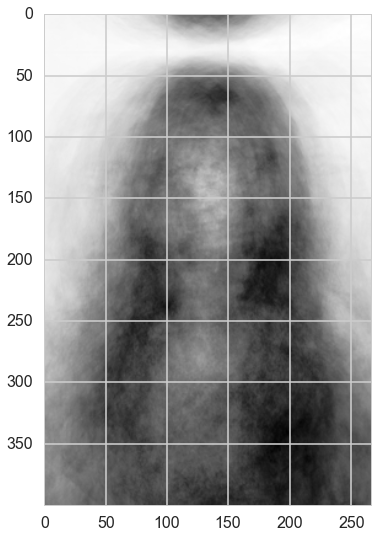

In [283]:
alignedMean = np.mean(alignedSet,axis=0);
plt.imshow(alignedMean);

In [282]:
viableIndices

array([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,  12,  13,  14,
        15,  16,  17,  18,  19,  21,  22,  23,  24,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 18

In [296]:
alignedSet[0]

array([[ 73,  72,  70, ...,  94,  92,  91],
       [ 71,  71,  70, ...,  93,  92,  91],
       [ 69,  70,  71, ...,  92,  91,  91],
       ..., 
       [ 81,  82,  84, ..., 122, 120, 120],
       [ 80,  80,  82, ..., 139, 129, 124],
       [ 78,  79,  81, ..., 156, 142, 131]])

In [308]:
A=[1,2,3]
C=[4,5,6]
B=[7,8,9]
np.concatenate([A,B,C],axis=0)

array([1, 2, 3, 7, 8, 9, 4, 5, 6])

In [314]:
dims = alignedSet[0].shape
vecLen = dims[0]*dims[1]
matsAsVects=[]

for im in alignedSet:
    matsAsVects.append(np.reshape(im,vecLen))
    
#now matsAsVects is a vector of 182 of these 106800-vectors.

In [319]:
sum(matsAsVects).shape

(106800,)